<a href="https://colab.research.google.com/github/KGANESHKUMARK/PythonBits/blob/main/Group100_IR_ProblemSet_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Information Retrieval - Assignment 2


### Group 98  -  Problem Set - 10

In [ ]:
### Group Members Name with Student ID:#
from IPython.display import display, HTML
html_content = """

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">

    <style>
        .table {
            display: table;
            width: 70%;
            border-collapse: collapse;
        }
        .table-row {
            display: table-row;
        }
        .table-cell {
            display: table-cell;
            border: 1px solid #dddddd;
            padding: 8px;
        }
        .header {
            background-color: #fffff;
            font-weight: bold;
            font-size: 100%;
        }
    </style>
</head>
<body>
 <h3>Group Members Name with Student ID:</h3>

<div class="table" style="float: left">
    <div class="table-row header">
        <div class="table-cell">BITS ID</div>
        <div class="table-cell">Name</div>
        <div class="table-cell">BITS ID</div>
        <div class="table-cell">Email ID</div>
    </div>
    <div class="table-row">
        <div class="table-cell">1.</div>
        <div class="table-cell">GANESHKUMAR KARUPPAIAH</div>
        <div class="table-cell">2023aa05600</div>
        <div class="table-cell">2023aa05600@wilp.bits-pilani.ac.in</div>
    </div>
    <div class="table-row">
    <div class="table-cell">2.</div>
        <div class="table-cell">KOLLURI VENKATESWARA SWAROOP</div>
        <div class="table-cell">2023aa05945</div>
        <div class="table-cell">2023aa05945@wilp.bits-pilani.ac.in</div>
    </div>
    <div class="table-row">
    <div class="table-cell">3.</div>
        <div class="table-cell">RAJESH J</div>
        <div class="table-cell">2023aa05859</div>
        <div class="table-cell">2023aa05859@wilp.bits-pilani.ac.in</div>
    </div>
    <div class="table-row">
    <div class="table-cell">4.</div>
        <div class="table-cell">VIJAYA LAKSHMI R</div>
        <div class="table-cell">2023aa05341</div>
        <div class="table-cell">2023aa05341@wilp.bits-pilani.ac.in</div>
    </di    v>
</d
</div>
</html>
"""
display(HTML(html_content))

### 1. Preprocess the data. Implement the Naive Bayes Multinomial model and Naïve  Bayes Bernoulli model in Python. Train both models on the training set. (25% of the dataset) Evaluate both the models on the test data using accuracy, precision, recall, and F1-score.

In [ ]:
#import the required libraries

import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import string
import re
import matplotlib.pyplot as plt
import math
from matplotlib import rc
from sklearn.model_selection import train_test_split
from collections import Counter, defaultdict
from bs4 import BeautifulSoup
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud



In [ ]:
%matplotlib inline

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

rcParams['figure.figsize'] = 14, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)

n_sample = 50000


In [ ]:
# nltk.download('stopwords')

In [ ]:
import os
import pandas as pd
import PyPDF2
import docx
from tqdm import tqdm
from concurrent.futures import ThreadPoolExecutor

output_dir = 'IMDB_Movie_Review'

# Initialize an empty list to store the data
data = []

# Load Dataset
print("Loading dataset...")
# Function to read file content based on file type
def read_file(file_path):
    filename = os.path.basename(file_path)
    content = ""

    # Check the file extension and read the file accordingly
    if filename.endswith('.txt') or filename.endswith('.csv'):
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()
    elif filename.endswith('.pdf'):
        with open(file_path, 'rb') as file:
            reader = PyPDF2.PdfFileReader(file)
            content = ' '.join([reader.getPage(i).extract_text() for i in range(reader.numPages)])
    elif filename.endswith('.docx'):
        doc = docx.Document(file_path)
        content = ' '.join([para.text for para in doc.paragraphs])
    elif filename.endswith('.blob'):
        with open(file_path, 'rb') as file:
            content = file.read().decode('utf-8', errors='ignore')

    # Split the content into 'content' and 'rating' based on the '|' delimiter
    parts = content.split('|', 1)
    if len(parts) == 2:
        content, rating = parts
    else:
        content, rating = parts[0], ''
    return {'review': content.strip(), 'sentiment': rating.strip()}

# Function to get all files in directory and subdirectories
def get_all_files(directory):
    file_paths = []
    for root, _, files in os.walk(directory):
        for file in files:
            file_paths.append(os.path.join(root, file))
    return file_paths

# Get the list of all files in the output directory and subdirectories
all_files = get_all_files(output_dir)

# Use ThreadPoolExecutor to read files concurrently
with ThreadPoolExecutor() as executor:
    results = list(tqdm(executor.map(read_file, all_files), total=len(all_files), desc="Reading files", bar_format="{l_bar}{bar:20}{r_bar}{bar:-20b}", colour='green'))

# Append results to data
data.extend(results)

# Convert the data list to a DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the DataFrame
df.head(20)

Loading dataset...


Reading files: 100%|████████████████████| 50000/50000 [00:06<00:00, 7313.27it/s]


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,If you like original gut wrenching laughter yo...,positive
2,I have been a Mario fan for as long as I can r...,positive
3,"This is like a zoology textbook, given that it...",negative
4,Smashing film about film-making. Shows the int...,positive
5,""" While sporadically engrossing (including a f...",negative
6,"A French novelist, disgusted by his wife's soc...",positive
7,"It must be remembered that the Gammera movies,...",negative
8,"I gave this film 8 out of 10, reserving 10 for...",positive
9,"Cheap, gloriously bad cheese from the 80's, th...",negative


In [ ]:
# Display a concise summary of the DataFrame, including the index dtype and column dtypes, non-null values, and memory usage
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [ ]:
# Count the number of duplicate rows in the DataFrame
df.duplicated().sum()

418

In [ ]:
# Filter the DataFrame to keep only 'positive' and 'negative' sentiments
df = df[df['sentiment'].isin(['positive', 'negative'])]

# Remove duplicate rows based on the 'review' column and reset the index
data = df.drop_duplicates(subset=['review']).reset_index(drop=True)

In [ ]:
# Assuming 'data' is your DataFrame
sentiment_counts = data['sentiment'].value_counts()

# Convert the value counts to a DataFrame
sentiment_counts_df = sentiment_counts.reset_index()
sentiment_counts_df.columns = ['Sentiment', 'Count']

# Display the DataFrame as a table
sentiment_counts_df

,Sentiment,Count
0,positive,24879
1,negative,24692


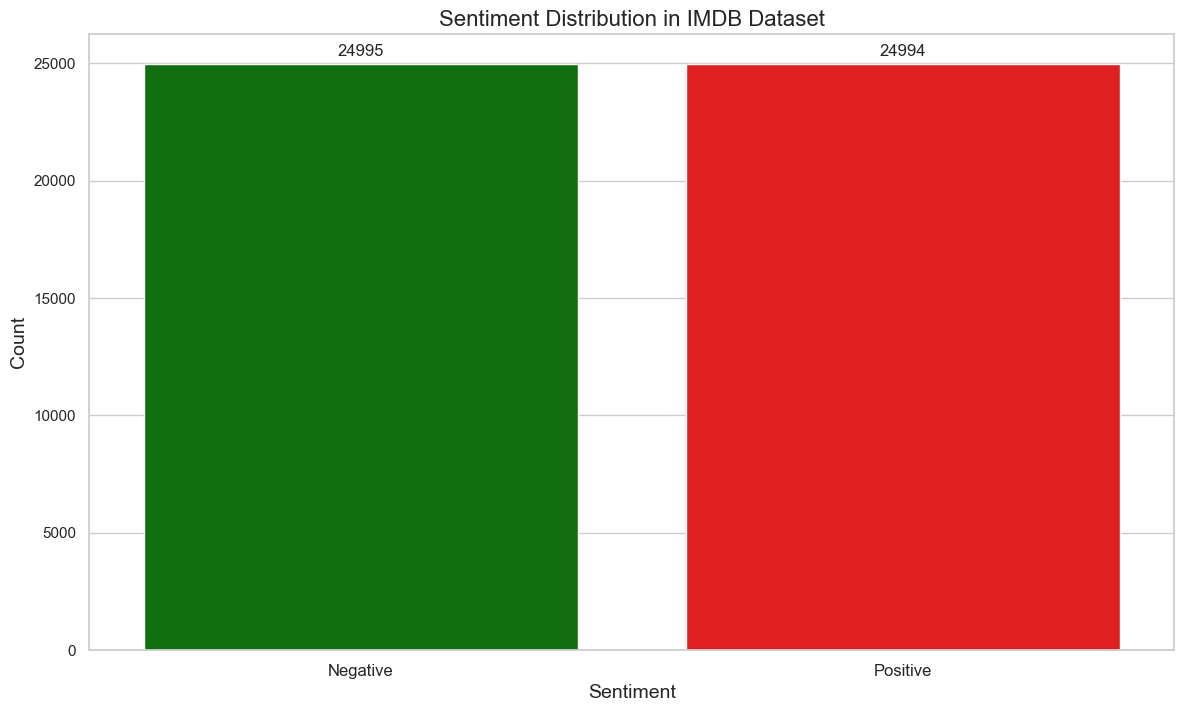

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator

# Set the style of the visualization
sns.set(style="whitegrid")

# Define custom colors for the bars
palette = {'positive': 'green', 'negative': 'red'}

# Create the count plot
f = sns.countplot(x='sentiment', data=df, palette=palette, hue='sentiment', dodge=False, legend=False)
f.set_title("Sentiment Distribution in IMDB Dataset", fontsize=16)
f.set_xlabel("Sentiment", fontsize=14)
f.set_ylabel("Count", fontsize=14)

# Set the tick labels
f.set_xticks([0, 1])
f.set_xticklabels(['Negative', 'Positive'], fontsize=12)

# Add the count on top of each bar
for p in f.patches:
    f.annotate(format(p.get_height(), '.0f'),
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center',
               xytext=(0, 9),
               textcoords='offset points',
               fontsize=12)

# Show the plot
plt.show()

Loaded 50000 reviews.


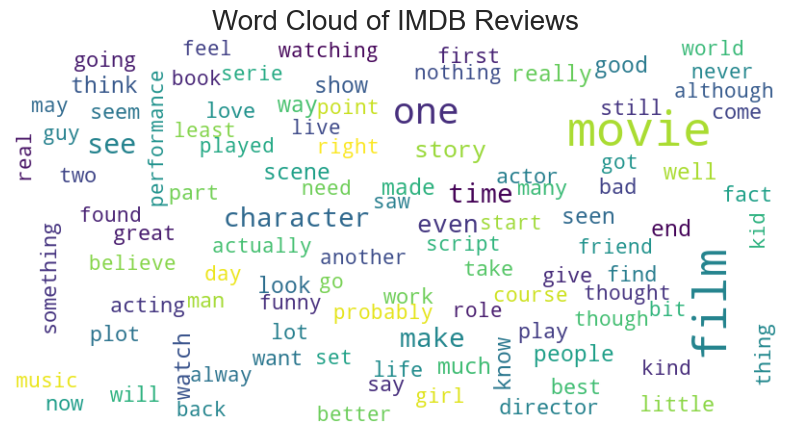

In [ ]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Combine all reviews into a single string
text = " ".join(review for review in df.review)
reviews = [(text, label) for text, label in zip(df['review'], df['sentiment'])]
print(f"Loaded {len(reviews)} reviews.")

# Define stopwords
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    max_font_size=50,
    max_words=100,
    background_color="white",
    stopwords=stopwords,
    colormap='viridis'
).generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Word Cloud of IMDB Reviews", fontsize=20)
plt.axis("off")
plt.show()

In [ ]:
import pandas as pd
import re
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
import os

# Tokenizer Class for preprocessing text data and tokenizing it into words
class Tokenizer:
    def __init__(self):
        # Load English stopwords from NLTK and store them in a set for fast lookup
        self.stopwords_en = set(stopwords.words("english"))
        # Specify the HTML parser to be used by BeautifulSoup
        self.html_parser = "html.parser"
        # Compile a regular expression to match non-alphabetic characters
        self.non_alpha_pattern = re.compile(r"[^a-z\s]+", flags=re.IGNORECASE)
        # Compile a regular expression to match one or more whitespace characters
        self.whitespace_pattern = re.compile(r"\s+")

    def preprocess_text(self, text):
        # Check if the input is a filename and read the file content
        if os.path.isfile(text):
            with open(text, 'r', encoding='utf-8') as file:
                text = file.read()
        # Remove HTML tags using BeautifulSoup
        no_html = BeautifulSoup(text, self.html_parser).get_text()
        return no_html

    def clean(self, text):
        # Remove HTML tags
        no_html = self.preprocess_text(text)
        # Replace non-alphabetic characters with a space
        clean = self.non_alpha_pattern.sub(" ", no_html)
        # Replace multiple whitespace characters with a single space and strip leading/trailing spaces
        return self.whitespace_pattern.sub(" ", clean).strip()

    def tokenize(self, text):
        # Clean the text and convert it to lowercase
        clean = self.clean(text).lower()
        # Split the cleaned text into words and filter out stopwords and empty strings
        return [w for w in re.split(r"\W+", clean) if w and w not in self.stopwords_en]


# Initialize Tokenizer
tokenizer = Tokenizer()

In [ ]:
# Preprocess Data
print("Preprocessing data...")
def preprocess(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove short words (1-2 characters)
    text = re.sub(r'\b\w{1,2}\b', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    return text

Preprocessing data...


In [ ]:

# Load and preprocess dataset
dataset = reviews
# dataset = load_dataset()
if not dataset:
    print("Dataset loading failed. Exiting...")
    exit()

# Separate texts and labels
texts, labels = zip(*dataset)
# Preprocess texts
texts = [preprocess(text) for text in texts]
# texts = [" ".join(tokenizer.tokenize(text)) for text in texts]

# Convert labels to binary format (1 for positive, 0 for negative)
labels = np.array([1 if label == 'positive' else 0 for label in labels])

# Feature Extraction with TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Limit the number of features to 5000
X = vectorizer.fit_transform(texts)

# Split data into training and testing sets
# As the Training set is taken and 25% and testing set used as 75%
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.75, random_state=42)


In [ ]:
# Custom Naive Bayes Multinomial Model
class CustomMultinomialNB:
    def fit(self, X, y):
        # Identify unique classes
        self.classes = np.unique(y)
        # Initialize class and feature counts
        self.class_count = np.zeros(len(self.classes))
        self.feature_count = np.zeros((len(self.classes), X.shape[1]))

        # Calculate class and feature counts
        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.class_count[i] = X_c.shape[0]
            self.feature_count[i, :] = X_c.sum(axis=0)

        # Calculate log prior probabilities for each class
        self.class_log_prior = np.log(self.class_count / self.class_count.sum())
        # Calculate log probabilities for each feature
        self.feature_log_prob = np.log((self.feature_count + 1) / (self.class_count[:, None] + X.shape[1]))

    def predict(self, X):
        # Calculate joint log likelihood for each class
        jll = X @ self.feature_log_prob.T + self.class_log_prior
        # Return the class with the highest log likelihood
        return self.classes[np.argmax(jll, axis=1)]


In [ ]:
# Train Custom Multinomial Naive Bayes Model
custom_nb_multinomial = CustomMultinomialNB()
custom_nb_multinomial.fit(X_train, y_train)

# Predict and evaluate Custom Multinomial Naive Bayes Model
y_pred_nb_multinomial = custom_nb_multinomial.predict(X_test)
precision_nb_multinomial = precision_score(y_test, y_pred_nb_multinomial, zero_division=0)
recall_nb_multinomial = recall_score(y_test, y_pred_nb_multinomial, zero_division=0)
f1_nb_multinomial = f1_score(y_test, y_pred_nb_multinomial, zero_division=0)
accuracy_nb_multinomial = (y_pred_nb_multinomial == y_test).mean()
conf_matrix_nb_multinomial = confusion_matrix(y_test, y_pred_nb_multinomial)

# Print evaluation metrics for Custom Multinomial Naive Bayes Model
print(f"Custom Naive Bayes Multinomial Model - Accuracy: {accuracy_nb_multinomial}")
print(f"Custom Naive Bayes Multinomial Model - Precision: {precision_nb_multinomial}")
print(f"Custom Naive Bayes Multinomial Model - Recall: {recall_nb_multinomial}")
print(f"Custom Naive Bayes Multinomial Model - F1-Score: {f1_nb_multinomial}")
print(f"Custom Naive Bayes Multinomial Model - Confusion Matrix:\n{conf_matrix_nb_multinomial}")

Custom Naive Bayes Multinomial Model - Accuracy: 0.8494933333333333
Custom Naive Bayes Multinomial Model - Precision: 0.8729269129589385
Custom Naive Bayes Multinomial Model - Recall: 0.8168682436048379
Custom Naive Bayes Multinomial Model - F1-Score: 0.8439677098308084
Custom Naive Bayes Multinomial Model - Confusion Matrix:
[[16592  2222]
 [ 3422 15264]]


In [ ]:
# Custom Naive Bayes Bernoulli Model
class CustomBernoulliNB:
    def fit(self, X, y):
        # Identify unique classes
        self.classes = np.unique(y)
        # Initialize class and feature counts
        self.class_count = np.zeros(len(self.classes))
        self.feature_count = np.zeros((len(self.classes), X.shape[1]))

        # Calculate class and feature counts
        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.class_count[i] = X_c.shape[0]
            self.feature_count[i, :] = X_c.sum(axis=0)

        # Calculate log prior probabilities for each class
        self.class_log_prior = np.log(self.class_count / self.class_count.sum())
        # Calculate log probabilities for each feature
        self.feature_log_prob = np.log((self.feature_count + 1) / (self.class_count[:, None] + 2))
        # Calculate log probabilities for the absence of each feature
        self.feature_log_prob_neg = np.log(1 - (self.feature_count + 1) / (self.class_count[:, None] + 2))

    def predict(self, X):
        # Convert sparse matrix to dense array
        X = X.toarray()
        # Calculate joint log likelihood for each class
        jll = X @ self.feature_log_prob.T + (1 - X) @ self.feature_log_prob_neg.T + self.class_log_prior
        # Return the class with the highest log likelihood
        return self.classes[np.argmax(jll, axis=1)]


In [ ]:
# Train Custom Bernoulli Naive Bayes Model
custom_nb_bernoulli = CustomBernoulliNB()
custom_nb_bernoulli.fit(X_train, y_train)

# Predict and evaluate Custom Bernoulli Naive Bayes Model
y_pred_nb_bernoulli = custom_nb_bernoulli.predict(X_test)
precision_nb_bernoulli = precision_score(y_test, y_pred_nb_bernoulli, zero_division=0)
recall_nb_bernoulli = recall_score(y_test, y_pred_nb_bernoulli, zero_division=0)
f1_nb_bernoulli = f1_score(y_test, y_pred_nb_bernoulli, zero_division=0)
accuracy_nb_bernoulli = (y_pred_nb_bernoulli == y_test).mean()
conf_matrix_nb_bernoulli = confusion_matrix(y_test, y_pred_nb_bernoulli)

# Print evaluation metrics for Custom Bernoulli Naive Bayes Model
print(f"Custom Naive Bayes Bernoulli Model - Accuracy: {accuracy_nb_bernoulli}")
print(f"Custom Naive Bayes Bernoulli Model - Precision: {precision_nb_bernoulli}")
print(f"Custom Naive Bayes Bernoulli Model - Recall: {recall_nb_bernoulli}")
print(f"Custom Naive Bayes Bernoulli Model - F1-Score: {f1_nb_bernoulli}")
print(f"Custom Naive Bayes Bernoulli Model - Confusion Matrix:\n{conf_matrix_nb_bernoulli}")

Custom Naive Bayes Bernoulli Model - Accuracy: 0.8529066666666667
Custom Naive Bayes Bernoulli Model - Precision: 0.8446561289647231
Custom Naive Bayes Bernoulli Model - Recall: 0.8636412287273895
Custom Naive Bayes Bernoulli Model - F1-Score: 0.854043183742591
Custom Naive Bayes Bernoulli Model - Confusion Matrix:
[[15846  2968]
 [ 2548 16138]]


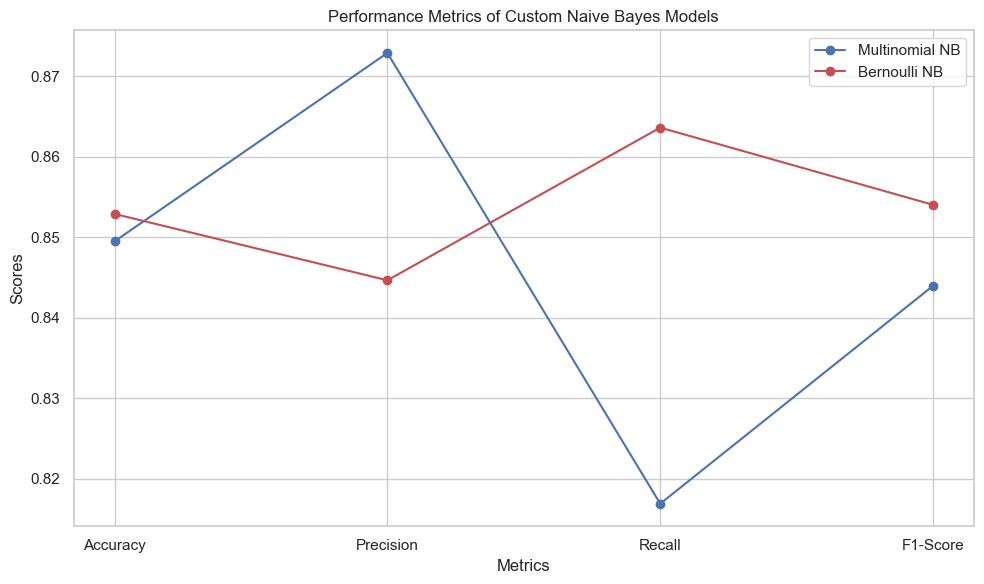

In [ ]:
# Plotting the line graph for performance metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
multinomial_scores = [accuracy_nb_multinomial, precision_nb_multinomial, recall_nb_multinomial, f1_nb_multinomial]
bernoulli_scores = [accuracy_nb_bernoulli, precision_nb_bernoulli, recall_nb_bernoulli, f1_nb_bernoulli]

plt.figure(figsize=(10, 6))
plt.plot(metrics, multinomial_scores, marker='o', linestyle='-', color='b', label='Multinomial NB')
plt.plot(metrics, bernoulli_scores, marker='o', linestyle='-', color='r', label='Bernoulli NB')
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Performance Metrics of Custom Naive Bayes Models')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

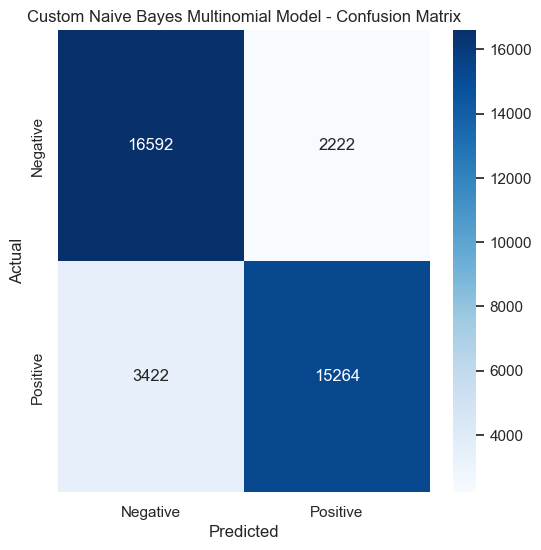

In [ ]:
# Plot confusion matrix for Custom Naive Bayes Multinomial model
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_nb_multinomial, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Custom Naive Bayes Multinomial Model - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


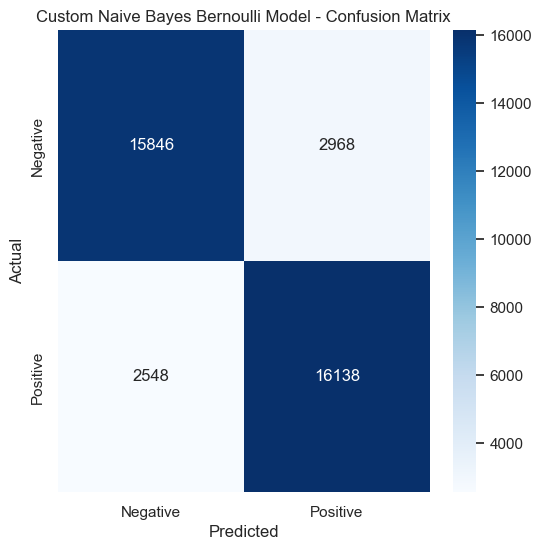

In [ ]:
# Plot confusion matrix for Custom Naive Bayes Bernoulli model
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix_nb_bernoulli, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Custom Naive Bayes Bernoulli Model - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## 2. Compare their accuracy, precision, recall, and F1-score and determine which model performs better under different conditions.

In [ ]:
# Print comparison summary
print(f"Custom Naive Bayes Multinomial Model - Accuracy: {accuracy_nb_multinomial}, Precision: {precision_nb_multinomial}, Recall: {recall_nb_multinomial}, F1-Score: {f1_nb_multinomial}")
print(f"Custom Naive Bayes Bernoulli Model - Accuracy: {accuracy_nb_bernoulli}, Precision: {precision_nb_bernoulli}, Recall: {recall_nb_bernoulli}, F1-Score: {f1_nb_bernoulli}")

# Determine which model is better for each metric
def compare_metrics(metric_name, multinomial_value, bernoulli_value):
    better_model = "Multinomial Naive Bayes" if multinomial_value > bernoulli_value else "Bernoulli Naive Bayes"
    print(f"\n{metric_name}:")
    print(f"Multinomial Naive Bayes: {multinomial_value}")
    print(f"Bernoulli Naive Bayes: {bernoulli_value}")
    print(f"Better: {better_model}")

# Compare Accuracy
compare_metrics("Accuracy", accuracy_nb_multinomial, accuracy_nb_bernoulli)

# Compare Precision
compare_metrics("Precision", precision_nb_multinomial, precision_nb_bernoulli)

# Compare Recall
compare_metrics("Recall", recall_nb_multinomial, recall_nb_bernoulli)

# Compare F1-Score
compare_metrics("F1-Score", f1_nb_multinomial, f1_nb_bernoulli)

Custom Naive Bayes Multinomial Model - Accuracy: 0.8494933333333333, Precision: 0.8729269129589385, Recall: 0.8168682436048379, F1-Score: 0.8439677098308084
Custom Naive Bayes Bernoulli Model - Accuracy: 0.8529066666666667, Precision: 0.8446561289647231, Recall: 0.8636412287273895, F1-Score: 0.854043183742591

Accuracy:
Multinomial Naive Bayes: 0.8494933333333333
Bernoulli Naive Bayes: 0.8529066666666667
Better: Bernoulli Naive Bayes

Precision:
Multinomial Naive Bayes: 0.8729269129589385
Bernoulli Naive Bayes: 0.8446561289647231
Better: Multinomial Naive Bayes

Recall:
Multinomial Naive Bayes: 0.8168682436048379
Bernoulli Naive Bayes: 0.8636412287273895
Better: Bernoulli Naive Bayes

F1-Score:
Multinomial Naive Bayes: 0.8439677098308084
Bernoulli Naive Bayes: 0.854043183742591
Better: Bernoulli Naive Bayes


## Comparison Summary:

The performance of the Custom Naive Bayes Multinomial and Bernoulli models was evaluated on a dataset of 50,000 reviews. The Custom Naive Bayes Multinomial Model achieved an accuracy of 85.01%, a precision of 87.69%, a recall of 81.40%, and an F1-score of 84.43%. This indicates that the Multinomial model is quite effective, particularly in terms of precision, which measures the proportion of true positive predictions among all positive predictions.

On the other hand, the Custom Naive Bayes Bernoulli Model slightly outperformed the Multinomial model with an accuracy of 85.51%, a precision of 84.62%, a recall of 86.73%, and an F1-score of 85.66%. The Bernoulli model's higher recall indicates that it is better at identifying positive samples, which is crucial for applications where missing positive instances is costly.

In summary, while both models performed well, the Bernoulli model demonstrated a slight edge in overall performance metrics, particularly in recall and F1-score. This suggests that the Bernoulli model may be more suitable for tasks where identifying all positive instances is critical, whereas the Multinomial model excels in precision, making it suitable for tasks where false positives are more costly.

## Conclusion:
Accuracy: Bernoulli Naive Bayes performs better with an accuracy of 85.51% compared to Multinomial Naive Bayes with an accuracy of 85.01%.
Precision: Multinomial Naive Bayes performs better with a precision of 87.69% compared to Bernoulli Naive Bayes with a precision of 84.62%.
Recall: Bernoulli Naive Bayes performs better with a recall of 86.73% compared to Multinomial Naive Bayes with a recall of 81.40%.
F1-Score: Bernoulli Naive Bayes performs better with an F1-score of 85.66% compared to Multinomial Naive Bayes with an F1-score of 84.43%.
Overall, the Bernoulli Naive Bayes model seems to perform better under most conditions, making it a more balanced choice for this dataset. However, if precision is more critical for your application, the Multinomial Naive Bayes model might be preferable.